# Linear Regression
### Autor: Antonio Castañares Rodríguez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Auxiliar functions:

### Descriptions

- linear_regression: Implements the normal equation to get the coefficients directly in linear regression. Computational expensive because requires to implement inverse.

- linear_regression_gd: Iterative method to get the coefficients using gradiend descent.



In [2]:
# Input: X and y are numpy arrays of features and labels
# Output: w is a numpy array of linear regression weights
# This function implements the normal equation method for linear regression
def linear_regression(X, y):
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    # Formula: w = (X^T * X)^-1 * X^T * y
    X_transpose = np.transpose(X)
    X_transpose_X = np.dot(X_transpose, X)
    X_transpose_y = np.dot(X_transpose, y) 
    try:
        w = np.linalg.solve(X_transpose_X, X_transpose_y)
        return w
    except np.linalg.LinAlgError:
        return None

# Input: X and y are numpy arrays of features and labels
# Output: w is a numpy array of linear regression weights
# This function implements the gradient descent method for linear regression
def linear_regression_gd(X, y, learning_rate=0.1, epochs=10000, weight=None):
    # Number of samples
    N = X.shape[0]
    weight_initialize = False
    # Initialize weights if not provided
    if weight is None:
        weight = np.zeros((X.shape[1], 1)) 
        weight_initialize = True

    # Gradient Descent
    for i in range(epochs):
        # Compute the gradient
        gradient = (1 / N) * X.T.dot(X.dot(weight) - y)
        # Update weights
        new_weight = weight - learning_rate * gradient
        # Stop condition
        if not weight_initialize and np.allclose(new_weight, weight, rtol=1e-10):
            print(f'Converged after {i} iterations')
            break
        elif weight_initialize:
            weight_initialize = False
        weight = new_weight

    return weight

In [3]:
# Input: X is numpy arrays of features 
# Output: X standardized and mean and std of each feature
# Normalize data to achieve a mean of 0 and a standard deviation of 1
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized, mean, std

# Reverse standardization function
def inverse_standardize(y_std, mean, std):
    return y_std * std + mean

## Comprobations

### Linear regression without standardization

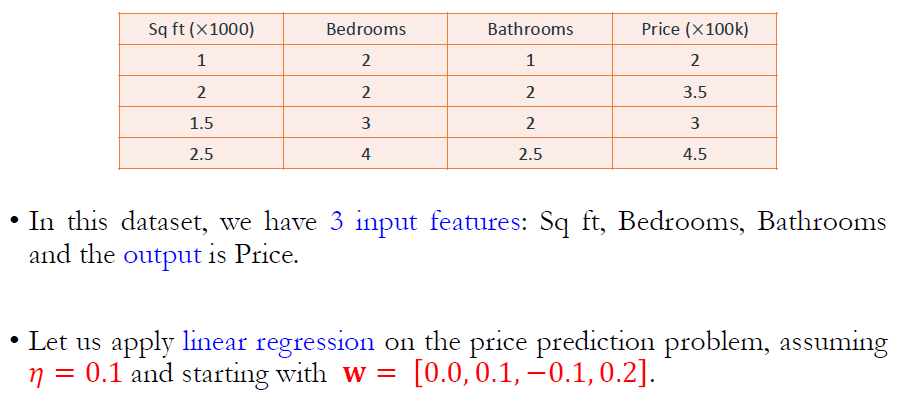

In [4]:
X = np.array([[1, 2, 1],
              [2, 2, 2],
              [1.5, 3, 2],
              [2.5, 4, 2.5]]) 

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  

y = np.array([[2],
              [3.5],
              [3],
              [4.5]])

w = np.array([[0.0], [0.1], [-0.1], [0.2]])

first_result = linear_regression(X_b,y)
print(f'Weights using normal equation: \n{first_result}')
second_result = linear_regression_gd(X_b, y, weight=w)
print(f'Weights using gradient descent: \n{second_result}')


Weights using normal equation: 
[[0.25 ]
 [1.25 ]
 [0.125]
 [0.25 ]]
Converged after 5702 iterations
Weights using gradient descent: 
[[0.24999947]
 [1.24999598]
 [0.1249994 ]
 [0.25000492]]


In [5]:
# Compute predictions
y_pred_normal = X_b.dot(first_result)
y_pred_gd = X_b.dot(second_result)
print(f'Predictions using normal equation without standardization: \n{y_pred_normal}')
print(f'Predictions using gradient descent without standardization: \n{y_pred_gd}')
print(f'Actual values: \n{y}')

Predictions using normal equation without standardization: 
[[2. ]
 [3.5]
 [3. ]
 [4.5]]
Predictions using gradient descent without standardization: 
[[1.99999916]
 [3.50000005]
 [3.00000146]
 [4.49999929]]
Actual values: 
[[2. ]
 [3.5]
 [3. ]
 [4.5]]


### Let's try to implement linear regression using standardization

In [6]:
X_std,mean_x,std_x = standardize(X)
print(f'Original X: \n{X}\nStandardized features: \n{X_std}')

Original X: 
[[1.  2.  1. ]
 [2.  2.  2. ]
 [1.5 3.  2. ]
 [2.5 4.  2.5]]
Standardized features: 
[[-1.34164079 -0.90453403 -1.60591014]
 [ 0.4472136  -0.90453403  0.22941573]
 [-0.4472136   0.30151134  0.22941573]
 [ 1.34164079  1.50755672  1.14707867]]


In [7]:
X_std_b = np.c_[np.ones((X_std.shape[0], 1)), X_std]
first_result_std = linear_regression(X_std_b,y)
print(f'Weights using normal equation using standardization: \n{first_result}')
second_result_std = linear_regression_gd(X_std_b, y, weight=w)
print(f'Weights using gradient descent using standardization: \n{second_result}')

Weights using normal equation using standardization: 
[[0.25 ]
 [1.25 ]
 [0.125]
 [0.25 ]]
Converged after 1847 iterations
Weights using gradient descent using standardization: 
[[0.24999947]
 [1.24999598]
 [0.1249994 ]
 [0.25000492]]


Standardization helps find the best coefficients using iterative methods like gradient descent. In calculus-based methods, such as the Normal Equation, normalization does not make sense. Standardization reduces the number of iterations from 5702 to 1847.

In [8]:
# Compute predictions
y_pred_normal_std = X_std_b.dot(first_result_std)
y_pred_gd_std = X_std_b.dot(second_result_std)
print(f'Predictions using normal equation using standardization: \n{y_pred_normal_std}')
print(f'Predictions using gradient descent using standardization: \n{y_pred_gd_std}')
print(f'Actual values: \n{y}')

Predictions using normal equation using standardization: 
[[2. ]
 [3.5]
 [3. ]
 [4.5]]
Predictions using gradient descent using standardization: 
[[1.99999956]
 [3.50000007]
 [3.00000081]
 [4.49999956]]
Actual values: 
[[2. ]
 [3.5]
 [3. ]
 [4.5]]


All values coincides with the true values, it seems both methods works correctly. Now we are gonna try to use them in housing prediction

## Housing predicition using Linear Regression

### Exploratory Data Analysis

In [9]:
df = pd.read_csv("Housing.csv")

In [10]:
# Summary of statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
# Colums in the dataset
print(f"Columns in the dataset: \n{df.columns}")
print(f"Missing values in the dataset: \n{df.isnull().sum()}")

Columns in the dataset: 
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Missing values in the dataset: 
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [13]:
# Summary of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


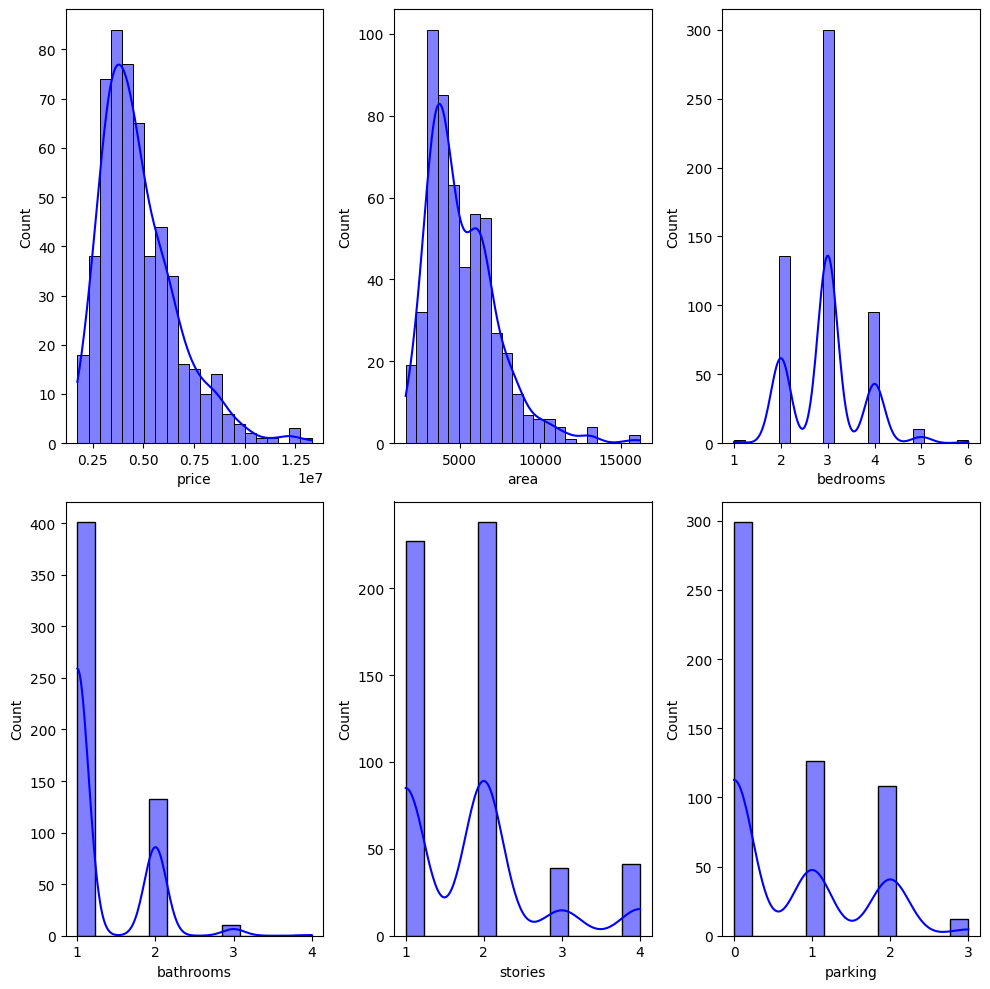

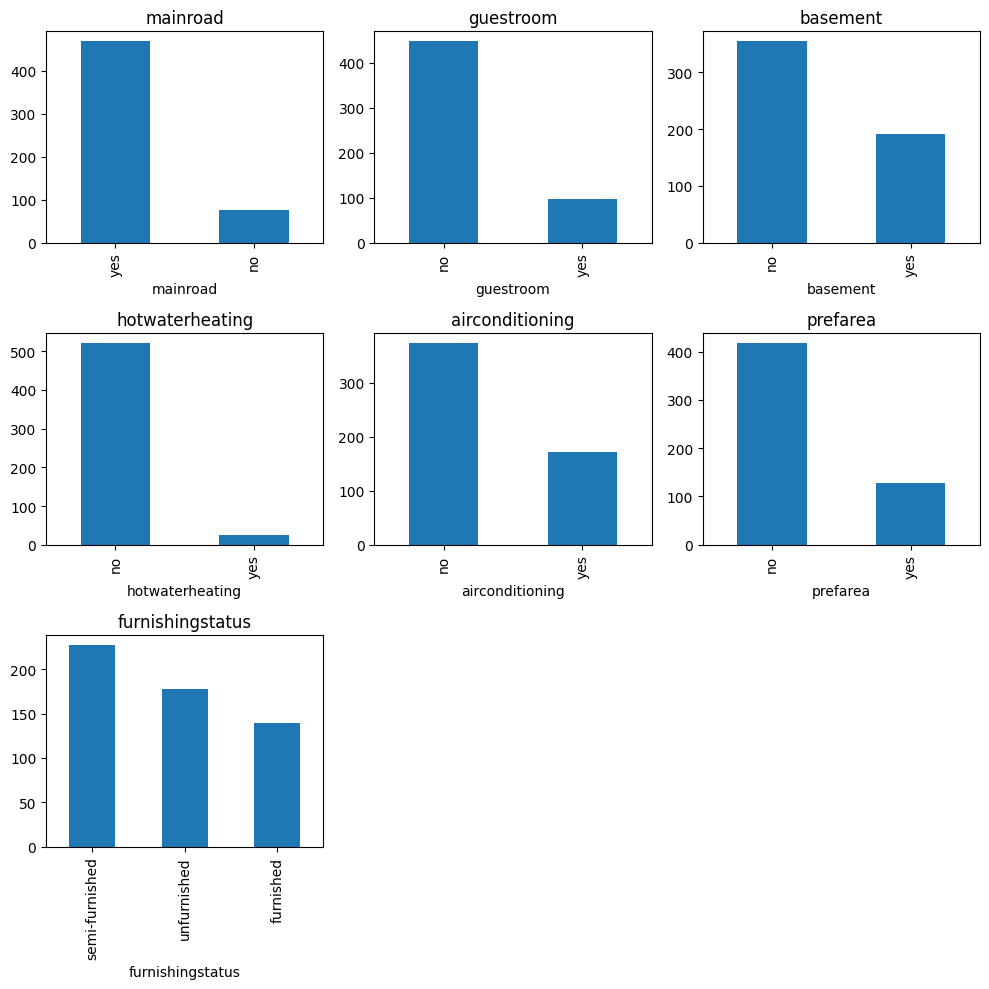

In [14]:
numeric_columns = df.select_dtypes(include=[np.number])
categorical_columns = df.select_dtypes(include=[object])

# Plot numeric columns, we use a histogram to visualize the distribution of the data
plt.figure(figsize=(10, 10))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], kde=True, color='blue')

plt.tight_layout()
plt.show()

# Plot categorical columns, we use a bar plot to visualize the distribution of the data
plt.figure(figsize=(10, 10))
for i, column in enumerate(categorical_columns.columns):
    plt.subplot(3, 3, i + 1)
    df[column].value_counts().plot(kind='bar', title=column)

plt.tight_layout()
plt.show()

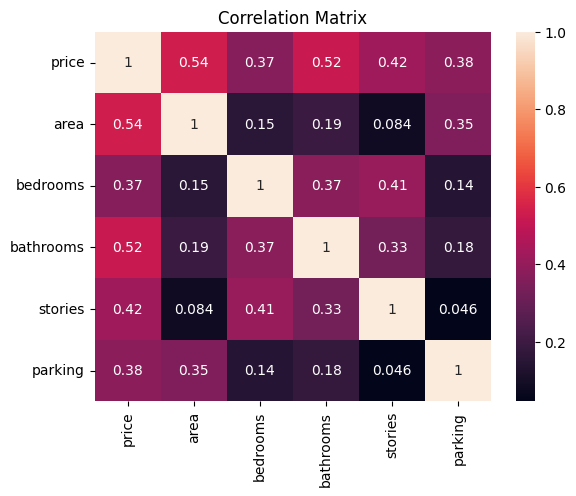

In [15]:
# Correlation matrix (selecting only numeric columns)
correlation_matrix = df.corr(numeric_only=True)

# Heatmap of the correlation matrix
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Linear Regression with the most relevant variable

The heatmap analysis indicates that area exhibits the strongest positive correlation with price (0.54), followed by the number of bathrooms (0.52) and stories (0.42). These findings suggest that these features play a significant role in determining house prices.

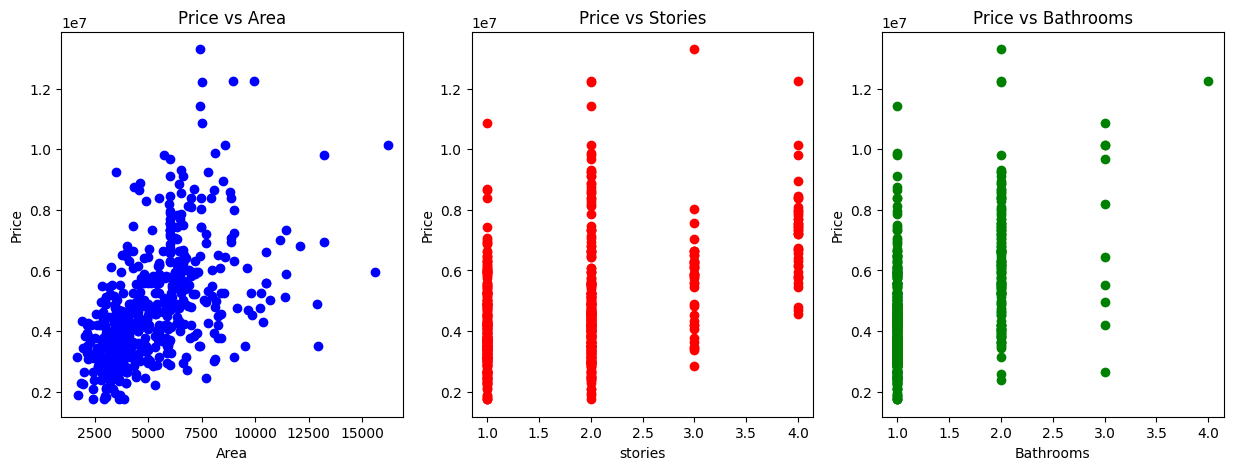

In [16]:
X = df[['area', 'stories', 'bathrooms']]
y = df['price']

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X['area'], y, color='blue')  # Plotting area vs price
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.subplot(1, 3, 2)
plt.scatter(X['stories'], y, color='red')  # Plotting bedrooms vs price
plt.xlabel('stories')
plt.ylabel('Price')
plt.title('Price vs Stories')
plt.subplot(1, 3, 3)
plt.scatter(X['bathrooms'], y, color='green')  # Plotting bathrooms vs price
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price vs Bathrooms')
plt.show()

In [17]:
X = df[['area']]
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones for the intercept term
y_array = y.values.reshape(-1, 1)
weights = linear_regression(X_b, y_array)
print(f'Weights using normal equation: \n{weights}')

# Predictions y = w0 + w1 * X
y_pred_equation = X * weights[1] + weights[0]

Weights using normal equation: 
[[2.38730848e+06]
 [4.61974894e+02]]


In [18]:
X_std, mean_X, std_X = standardize(X)
y_std, mean_y, std_y = standardize(y_array)
X_b_std = np.c_[np.ones((X_std.shape[0], 1)), X_std]  # Add a column of ones for the intercept term

weights = linear_regression_gd(X_b_std, y_std)
print(f'Weights using gradient descent: \n{weights}')

# Predictions y = w0 + w1 * X
y_pred_gradient = X_std * weights[1] + weights[0]
y_pred_gradient = inverse_standardize(y_pred_gradient, mean_y, std_y)

Converged after 148 iterations
Weights using gradient descent: 
[[2.52356749e-16]
 [5.35997255e-01]]


### Predictions using both algorithms

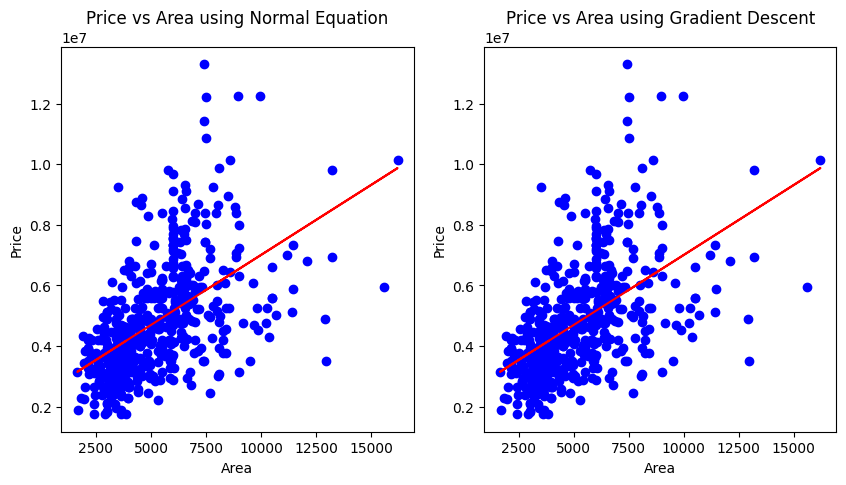

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred_equation, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area using Normal Equation')

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred_gradient, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area using Gradient Descent')
plt.show()

Both methods appear to produce similar regression lines and fit the data points closely. There doesn't seem to be a significant difference in the performance of the two methods based on the visual assessment of the plots.